In [1]:
import wandb

# List of run paths and corresponding labels
run_paths = [
    "andresvanschel/bert-base-uncased-finetuned_Att-Noneg-depth0/yl7ozblr",
    "andresvanschel/bert-base-uncased-finetuned_Att-Noneg-depth1/gxw2p27p",
    "andresvanschel/bert-base-uncased-finetuned_Att-Noneg-depth2/3zsbpkut",
]
labels = ["depth-0", "depth-1", "depth-2"]  # Custom labels for each run
colors = ["#A1A9AD", "#479A5F", "#5387DD"]  # Custom colors for each depth

# Initialize lists to store labels and accuracy values
accuracies = []

# Extract test/accuracy summary values
for run_path in run_paths:
    api = wandb.Api()
    run = api.run(run_path)
    accuracies.append(run.summary.get("test/accuracy", None))



In [ ]:
# Create a wandb.Table to store the data
data_table = wandb.Table(data=list(zip(labels, accuracies, colors)), columns=["Depth", "Test Accuracy", "Color"])

# Use wandb.plot.bar to create the bar chart with custom colors
bar_chart = wandb.plot.bar(
    data_table,
    "Depth",
    "Test Accuracy",
    title="Test Accuracy for Different Depths",
    # color="Color"  # Specify the color column for custom colors
)

# Log the chart to a wandb run
with wandb.init(project="master_thesis", name="finetuning_BERT_test_accuracy_bar_chart") as run:
    run.log({"test_accuracy_bar_chart": bar_chart})

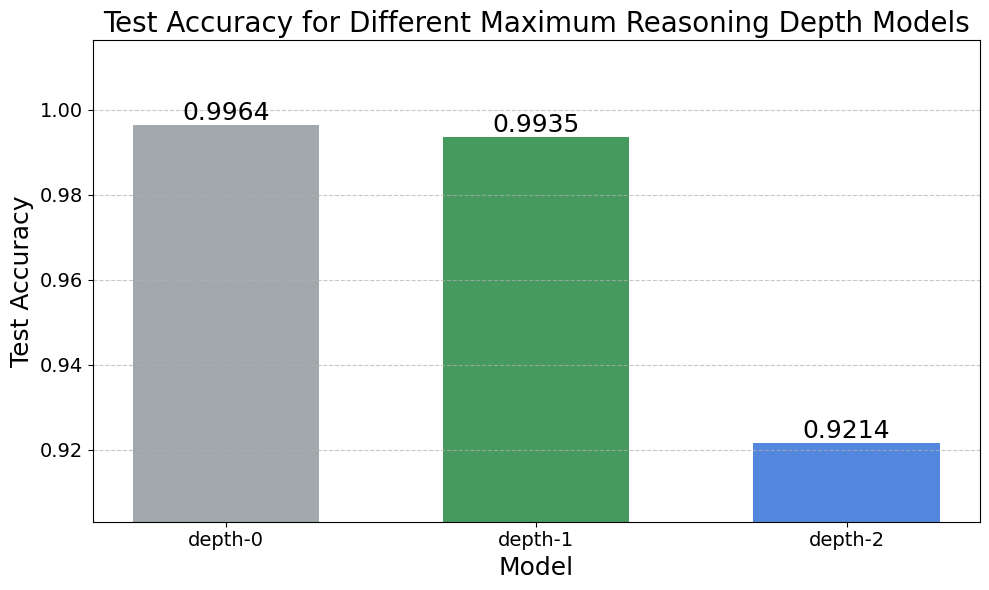

In [8]:
import numpy as np

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
bars = plt.bar(labels, accuracies, color=colors, width=0.6)

# Add labels and title
plt.title('Test Accuracy for Different Maximum Reasoning Depth Models', fontsize=20)
plt.xlabel('Model', fontsize=18)
plt.ylabel('Test Accuracy', fontsize=18)
plt.ylim([min(accuracies) * 0.98, max(accuracies) * 1.02])  # Set y-axis limits with some padding

# Change both x and y tick label sizes
plt.tick_params(axis='both', which='major', labelsize=14)

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=18)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

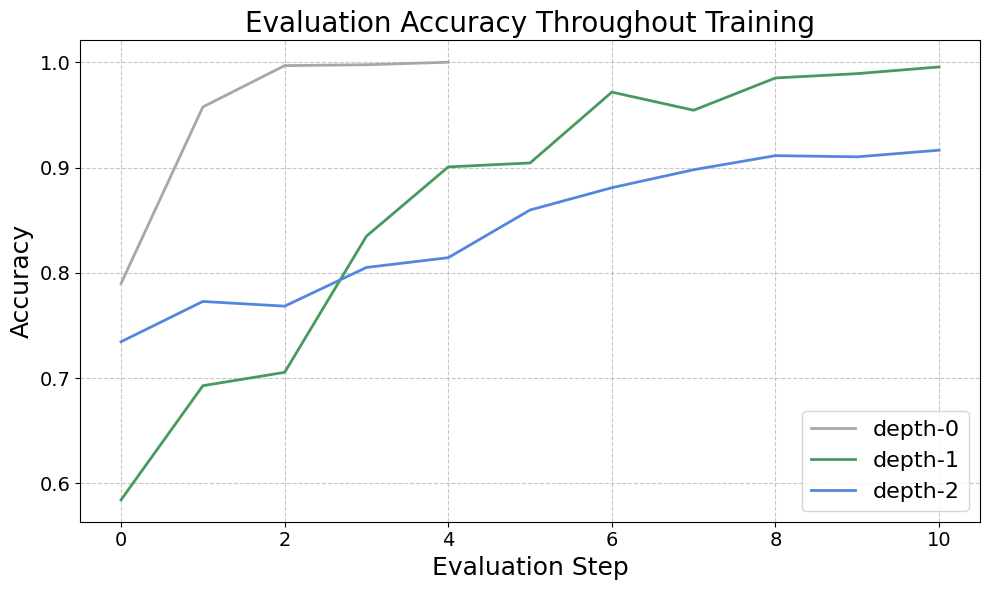

In [10]:
# Initialize a dictionary to store training accuracies for each model
training_accuracies = {}

# Extract evaluation accuracy throughout the run for each model
for i, run_path in enumerate(run_paths):
    api = wandb.Api()
    run = api.run(run_path)
    
    # Get history metrics
    history = run.history(keys=["eval/accuracy"])
    
    # Store in dictionary with corresponding label
    training_accuracies[labels[i]] = history["eval/accuracy"].values

# Plot the evolution of evaluation accuracy for each model
plt.figure(figsize=(10, 6))

for i, label in enumerate(labels):
    plt.plot(training_accuracies[label], label=label, color=colors[i], linewidth=2)

plt.title('Evaluation Accuracy Throughout Training', fontsize=20)
plt.xlabel('Evaluation Step', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=16)

# Change both x and y tick label sizes
plt.tick_params(axis='both', which='major', labelsize=14)

# Improve appearance
plt.tight_layout()
plt.show()